In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist

sns.set(style='white', context='notebook', palette='deep')

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrarray22","key":"e5f2190057d9831ec5c135e120b111c8"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d mloey1/ahdd1

 89% 45.0M/50.6M [00:00<00:00, 137MB/s]
100% 50.6M/50.6M [00:00<00:00, 145MB/s]


In [7]:
! unzip ahdd1.zip

Archive:  ahdd1.zip
  inflating: Arabic Handwritten Digits Dataset CSV/csvTestImages 10k x 784.csv  
  inflating: Arabic Handwritten Digits Dataset CSV/csvTestLabel 10k x 1.csv  
  inflating: Arabic Handwritten Digits Dataset CSV/csvTrainImages 60k x 784.csv  
  inflating: Arabic Handwritten Digits Dataset CSV/csvTrainLabel 60k x 1.csv  
  inflating: Train + Test Matlab.mat  
  inflating: csvTestImages 10k x 784.csv  
  inflating: csvTestLabel 10k x 1.csv  
  inflating: csvTrainImages 60k x 784.csv  
  inflating: csvTrainImages 60k x 784/csvTrainImages 60k x 784.csv  
  inflating: csvTrainLabel 60k x 1.csv  


#Spliting dataSet into training and testing

In [117]:
X_train = pd.read_csv("/content/csvTrainImages 60k x 784.csv")
Y_train = pd.read_csv("/content/csvTrainLabel 60k x 1.csv")
test = pd.read_csv("/content/csvTestImages 10k x 784.csv")
y_test = pd.read_csv("/content/csvTestLabel 10k x 1.csv")

In [118]:
print(X_train.shape)
print(Y_train.shape)
print(test.shape)
print(y_test.shape)

(59999, 784)
(59999, 1)
(9999, 784)
(9999, 1)


1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
0    5999
Name: 0, dtype: int64

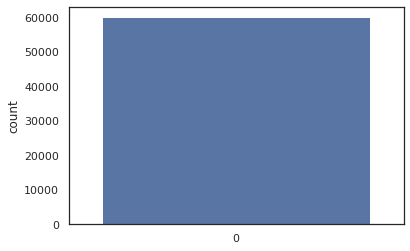

In [119]:
Y_train=Y_train.iloc[:,0]
y_test=y_test.iloc[:,0]
g = sns.countplot(Y_train)
Y_train.value_counts()

#Show some info about training and testing dataset

In [120]:
X_train.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495
count,59999.0,59999.0,59999.0,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,...,59999.000000,59999.00000,59999.000000,59999.000000,59999.000000,59999.000000,59999.0,59999.0,59999.0,59999.0
mean,0.0,0.0,0.0,0.000017,0.016034,0.057084,0.216570,0.675361,1.072185,0.971450,...,0.018600,0.02705,0.054434,0.015817,0.007917,0.004767,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.004083,1.540061,3.098098,6.047045,10.869691,13.871559,12.833792,...,1.467819,1.66216,2.874302,1.172126,0.848358,0.752527,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,1.000000,237.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,179.000000,200.00000,238.000000,154.000000,146.000000,154.000000,0.0,0.0,0.0,0.0


In [121]:
Y_train.describe()

count    59999.000000
mean         4.500075
std          2.872270
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: 0, dtype: float64

In [122]:
test.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547
count,9999.0,9999.0,9999.0,9999.0,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.000000,9999.0,9999.0,9999.0,9999.0
mean,0.0,0.0,0.0,0.0,0.007701,0.026903,0.199120,0.579758,0.784478,0.712871,...,0.035904,0.036004,0.005001,0.000100,0.0,0.010401,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.750302,2.553954,6.023613,10.178160,11.646613,10.608175,...,2.170381,1.955829,0.490126,0.010001,0.0,0.738783,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,75.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,157.000000,134.000000,49.000000,1.000000,0.0,57.000000,0.0,0.0,0.0,0.0


In [123]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [124]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

#Normalization the dataset

In [125]:
X_train = X_train / 255.0
test = test / 255.0

In [126]:
print(X_train.shape)
print(Y_train.shape)

(59999, 784)
(59999,)


#Reshape the images to 28x28x1

In [127]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [128]:
print(X_train.shape)
print(Y_train.shape)

print(test.shape)
print(y_test.shape)

(59999, 28, 28, 1)
(59999,)
(9999, 28, 28, 1)
(9999,)


#Encoding the labels

In [129]:
Y_train = to_categorical(Y_train, num_classes = 10)
y_test  = to_categorical(y_test , num_classes = 10)

In [130]:
print(Y_train.shape)
print(y_test.shape)

(59999, 10)
(9999, 10)


#Spliting the data into training and testing

In [131]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=4)

In [132]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(53999, 28, 28, 1)
(53999, 10)
(6000, 28, 28, 1)
(6000, 10)


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


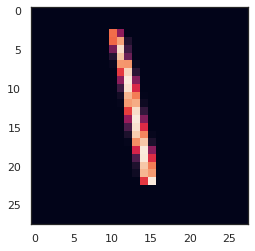

In [133]:
img_num=50


image = (X_train[img_num][:,:,0])
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)


print(Y_train[img_num])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


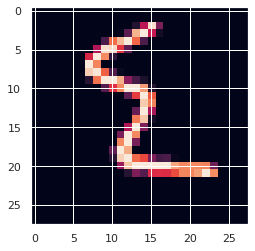

In [184]:
img_num=19


image = (X_train[img_num][:,:,0])
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)


print(Y_train[img_num])

#CNN Model

In [189]:
model = Sequential()

model.add(Conv2D(filters = 80, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))
model.summary()
model.save(r'model_hand.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 80)        2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 80)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 80)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        128064    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 64)         

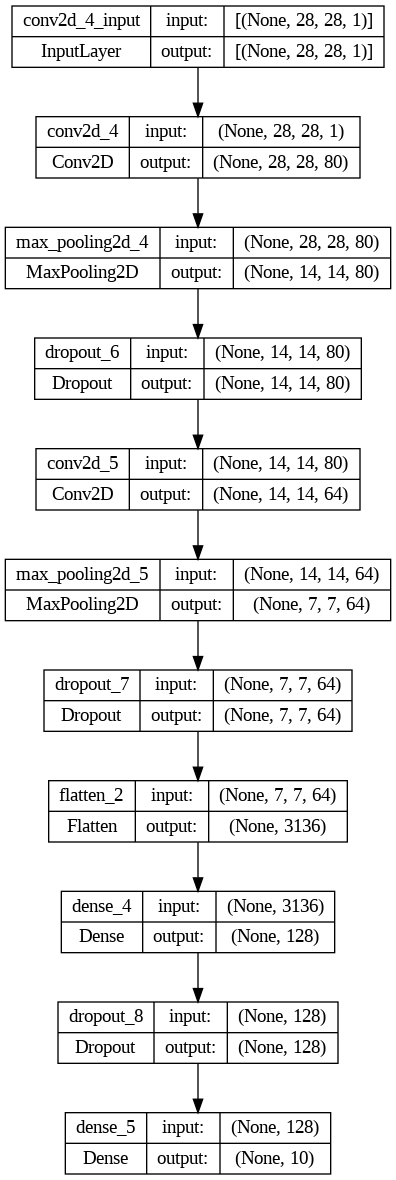

In [190]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

#Fit and Compile the Model

In [195]:
optimizer = SGD(learning_rate=0.001, momentum=0.30)

In [196]:
model.compile(optimizer = optimizer  , loss = "categorical_crossentropy", metrics=["accuracy"])

In [197]:
history = model.fit( X_train,Y_train, batch_size=64, epochs = 20, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/20
844/844 [==============================] - 7s 8ms/step - loss: 2.0922 - accuracy: 0.3279 - val_loss: 1.5682 - val_accuracy: 0.7848
Epoch 2/20
844/844 [==============================] - 6s 7ms/step - loss: 0.8965 - accuracy: 0.7779 - val_loss: 0.3400 - val_accuracy: 0.9270
Epoch 3/20
844/844 [==============================] - 6s 7ms/step - loss: 0.3999 - accuracy: 0.8900 - val_loss: 0.2051 - val_accuracy: 0.9480
Epoch 4/20
844/844 [==============================] - 6s 7ms/step - loss: 0.2875 - accuracy: 0.9205 - val_loss: 0.1551 - val_accuracy: 0.9577
Epoch 5/20
844/844 [==============================] - 6s 7ms/step - loss: 0.2371 - accuracy: 0.9333 - val_loss: 0.1302 - val_accuracy: 0.9637
Epoch 6/20
844/844 [==============================] - 6s 7ms/step - loss: 0.2075 - accuracy: 0.9416 - val_loss: 0.1177 - val_accuracy: 0.9678
Epoch 7/20
844/844 [==============================] - 6s 7ms/step - loss: 0.1850 - accuracy: 0.9488 - val_loss: 0.1068 - val_accuracy: 0.9707
Epoch 

#Plot Accuracy

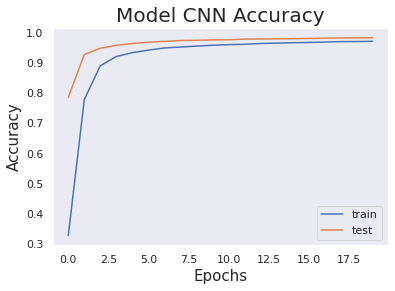

In [198]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model CNN Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.grid()
plt.legend()

#Plot The Loss

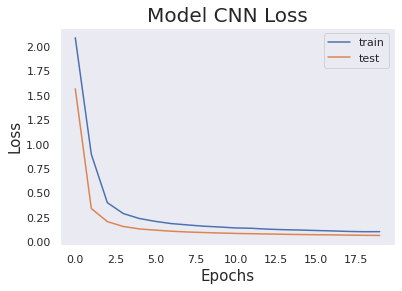

In [199]:
plt.figure(1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model CNN Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.grid()
plt.legend()

plt.show()

#Confusion Matrix on validation data

188/188 [==============================] - 0s 2ms/step


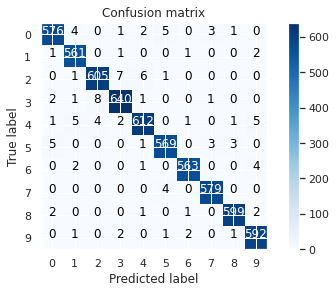

In [200]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

#Evaluate the Model

In [201]:
y_pred = model.predict(test) 

313/313 [==============================] - 1s 2ms/step


In [202]:
print(test.shape)
print(y_test.shape)
print(y_pred.shape)

(9999, 28, 28, 1)
(9999, 10)
(9999, 10)


In [203]:
score = model.evaluate(test , y_test,verbose=3)

print('Test accuarcy: %2f%%' % round((score[1] * 100),5))
print('Loss accuracy: %2f%%' % round((score[0] * 100),0))


Test accuarcy: 97.399740%
Loss accuracy: 8.000000%


In [204]:
results = np.argmax(y_pred,axis = 1)
results = pd.Series(results,name="Label")

#Testing the Model

1


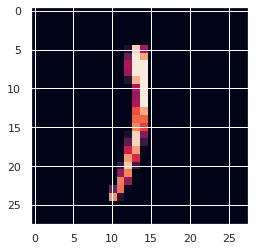

In [209]:
img_num= 90  


image = (test[img_num][:,:,0])
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)


print(results[img_num])

#Confusion Matrix on testing data

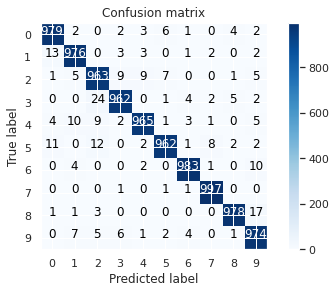

In [210]:
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, results) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 